## 확률분포의 추정

In [42]:
import numpy as np
import matplotlib.pyplot as plt

연속형 값을 갖는 자료의 확률분포의 개형을 그리기 위해서는 어떤 방법을 써야 할까요? 흔히 사용할 수 있는 방법이 히스토그램입니다. 

히스토그램을 그려보겠습니다. 히스토그램은 연속형 자료의 확률밀도함수에 대한 시각화 결과물로 bins 옵션을 이용하여 계급구간의 개수(bin의 수)를 정하는 것이 매우 중요합니다. 일반적으로 자료의 수가 $n$일때 계급구간의 수를 $\sqrt{n}$이하인 최대자연수로 잡습니다. 



아래 예제에서 다음을 확인하세요. (여기서는 subplots을 사용하지 않고 plt.hist()로 바로 그렸습니다.)
- bins: bin의 개수
- density: 히스토그램의 높이를 상대도수로 계산 여부 (default는 false로 되어 있으나, 히스토그램의 높이를 확률밀도로 해석하기 위해서는 true로 설정하여야 합니다)
- facecolor: 면의 색깔

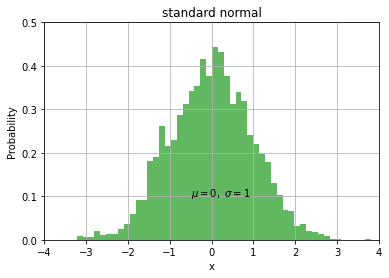

In [43]:
x = np.random.normal(0,1,size =2500)
fig, ax = plt.subplots()
ax.hist(x, bins=50, density=True, facecolor='tab:green', alpha=0.75)
ax.set_xlabel('x')
ax.set_ylabel('Probability')
ax.set_title('standard normal')
ax.text(-0.5, .1, r'$\mu=0,\ \sigma=1$')
ax.set_xlim(-4, 4)
ax.set_ylim(0, 0.5)
ax.grid(True)

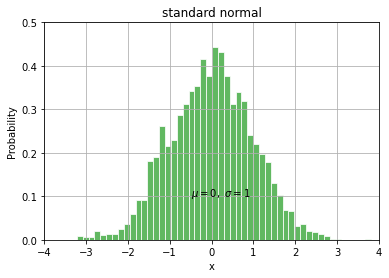

In [44]:
n, bins, patches = plt.hist(x, bins=50, density=True, facecolor='tab:green', edgecolor = 'white', alpha=0.75)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('standard normal')
plt.text(-0.5, .1, r'$\mu=0,\ \sigma=1$')
plt.xlim(-4, 4)
plt.ylim(0, 0.5)
plt.grid(True)

위 시각화 결과물은 실제로 표준정규분포를 따르는 자료의 개형을 잘 나타내고 있습니다. 하지만, 
같은 자료에 대해서 bin의 수를 너무 작게 잡거나 너무 크게 잡을때 히스토그램의 개형이 원래 자료의 분포를 잘 표현하지 못할 수 있습니다.아래 예를 확인해보세요.

Text(0.5, 1.0, 'standard normal')

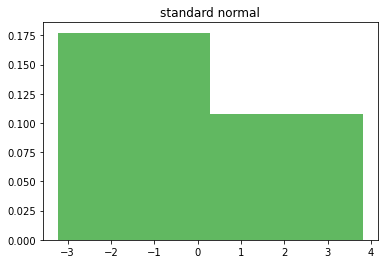

In [45]:
plt.hist(x, bins=2, density=True, facecolor='tab:green', alpha=0.75)
plt.title('standard normal')

Text(0.5, 1.0, 'standard normal')

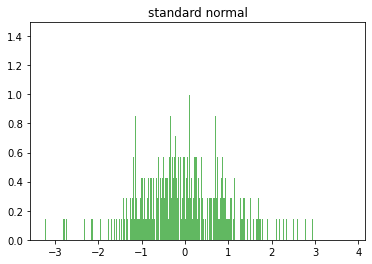

In [46]:
plt.hist(x, bins=2500, density=True, facecolor='tab:green', alpha=0.75)
plt.title('standard normal')

여기서는 subplots을 이용하여 히스토그램을 그리는 방법을 확인해보겠습니다. 같은 axes에 두개의 히스토그램을 그리는 예제입니다. 

Text(0.5, 1.0, 'two histogramss')

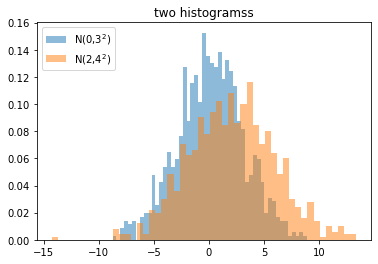

In [47]:
# 동시비교: 2개 데이터의 표시 
a = np.random.normal(0, 3, 1000)
b = np.random.normal(2, 4, 900)
fig, ax = plt.subplots()
ax.hist(a, 50, density = True, alpha = 0.5, label=r'N(0,$3^2$)')
ax.hist(b, 50, density = True, alpha = 0.5, label=r'N(2,$4^2$)')
ax.legend(loc='upper left')
ax.set_title("two histogramss")

다음으로 자료의 분포에 대한 모형가정이 있는 경우 (예: 정규분포, 지수분포 등) 분포의 모수를 추정한 후 그 값을 이용해서 확률밀도함수를 직접 구합니다. 

정규분포의 확률밀도함수 함수를 직접 만들어 봅시다.

$$f(x)= \frac{1}{\sqrt{2\pi}\sigma} \exp(-\frac{1}{2\sigma^2}(x-\mu)^2)$$

In [48]:
def pnorm(x,mu=0,sigma=1):
    y = 1/np.sqrt(2*np.pi)/sigma * np.exp(-(x-mu)**2 / (2 * sigma**2))
    return y

확률밀도함수를 구해봅시다.


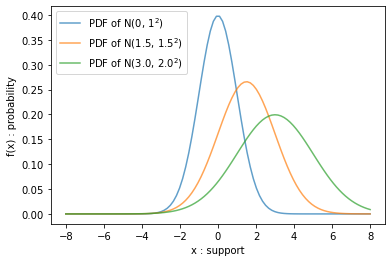

In [49]:
# 확률밀도함수 모수 설정
mu1, sigma1 = 0.0, 1.0
mu2, sigma2 = 1.5, 1.5
mu3, sigma3 = 3.0, 2.0
# 확률변수 X의 공간과 X값에 따른 확률 계산
# 정규분포 pdf를 직접 이용
x = np.linspace(-8, 8, 100)
prob_1 = pnorm(x,mu1,sigma1) 
prob_2 = pnorm(x,mu2,sigma2) 
prob_3 = pnorm(x,mu3,sigma3) 
# 확률밀도함수 시각화
fig, ax = plt.subplots()
ax.plot(x, prob_1, alpha=0.7, label=r'PDF of N(0, $1^2$)')
ax.plot(x, prob_2, alpha=0.7, label=r'PDF of N(1.5, $1.5^2$)')
ax.plot(x, prob_3, alpha=0.7, label=r'PDF of N(3.0, $2.0^2$)')
# 축, 범주 설정
ax.set_xlabel('x : support')
ax.set_ylabel('f(x) : probability')
ax.legend(loc='upper left')

경험적 누적확률분포함수를 그려봅시다.  전체 자료의 개수가 $n$이라고 할 때, 관찰된 자료값 위에서 확률 $1/n$을 가지도록 확률분포를 설정하면 됩니다. 관찰한 자료를 $x_i$라고 합시다. 경험적 누적확률분포함수의 $x$ 위에서 값은 아래와 같이 계산합니다.

$$\hat F(x) = \frac{1}{n}\sum_{i=1}^n I(x_i \leq x)$$

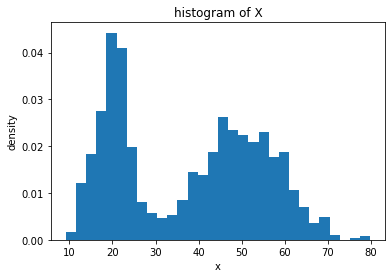

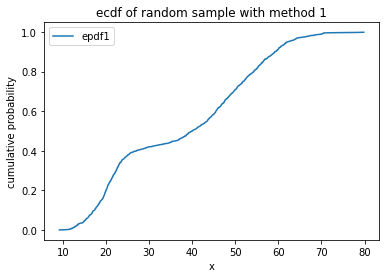

In [50]:
mu1, mu2 = 20.0, 50.0
sigma1, sigma2 = 4, 9
n1, n2 = 500, 700

sample_1 = np.random.normal(mu1, sigma1, n1)
sample_2 = np.random.normal(mu2, sigma2, n2)
sample_vec = np.concatenate([sample_1, sample_2])
plt.hist(sample_vec, bins=30, density=True)
plt.xlabel('x')
plt.ylabel('density')
plt.title('histogram of X')
plt.show()

#%%
# 경험적 누적분포함수 시각화
plt.plot(np.sort(sample_vec), np.linspace(0, 1, len(sample_vec), endpoint=False), label='epdf1')
plt.xlabel('x')
plt.ylabel('cumulative probability')
plt.title('ecdf of random sample with method 1')
plt.legend()
plt.show()